# Module: Programming for Data Analysis

# Project 2019

# Lecturer: Brian McGinley

## Introduction
 The Objective of this project is
 
    - Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four diﬀerent variables. 
    - Investigate the types of variables involved, their likely distributions, and their relationships with each other.
    - Synthesise/simulate a data set as closely matching their properties as possible.
    - Detail research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

## Real-world phenomenon 

I decide to look at the factors effecting salaries of age 20 - 60

column in dataset


Gender:
Age:
Education:
Occupation:
Experience
Income:
Living Area:(rural,Urban)
Time to Travel to Work:
General Health:

we  have to collect the data of 200  young people I decide to have 50% males and 50% females 

In [8]:
#import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
data1 = ['GENDER: Female,Male',
         'AGE: years',
         'EDUCATION: Level',
         'OCCUPATION: ',
         'EXPERIENCE: ',
         'AREA: 1= Urban, 0= Rural',
         'INCOME: Income yearly',
         'ETHNIC BACKGROUND: ',
         'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
         'MARITAL STATUS: 0= Single , 1 = Married, 3= Divorced ',
         'GENERAL HEALTH:  0= Poor, 1=Good,2= Very Good, 3=Excellent'
]
short_names = [d.split(':')[0] for d in data1]
data=pd.DataFrame(columns = short_names)

data


,GENDER,AGE,EDUCATION,OCCUPATION,EXPERIENCE,AREA,INCOME,ETHNIC BACKGROUND,SECTOR,MARITAL STATUS,GENERAL HEALTH


In [60]:
np.random.seed(256) # Set the random seed
a=['Male','Female']
data['GENDER']= np.random.choice(a, 200, p=[0.5,0.5])

data['GENDER']

0        Male
1      Female
2        Male
3        Male
4        Male
5        Male
6        Male
7        Male
8      Female
9        Male
10       Male
11     Female
12     Female
13     Female
14     Female
15       Male
16       Male
17       Male
18       Male
19     Female
20     Female
21     Female
22     Female
23     Female
24       Male
25     Female
26     Female
27     Female
28       Male
29       Male
        ...  
170      Male
171      Male
172    Female
173    Female
174      Male
175      Male
176    Female
177      Male
178      Male
179      Male
180      Male
181    Female
182      Male
183      Male
184    Female
185    Female
186    Female
187    Female
188    Female
189    Female
190    Female
191      Male
192    Female
193      Male
194      Male
195      Male
196    Female
197      Male
198      Male
199      Male
Name: GENDER, Length: 200, dtype: object

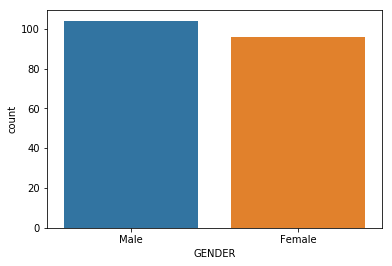

In [31]:
sns.countplot(x=data['GENDER'])

(array([22., 18., 18., 18., 15., 21., 18., 19., 28., 23.]),
 array([25. , 28.9, 32.8, 36.7, 40.6, 44.5, 48.4, 52.3, 56.2, 60.1, 64. ]),
 <a list of 10 Patch objects>)

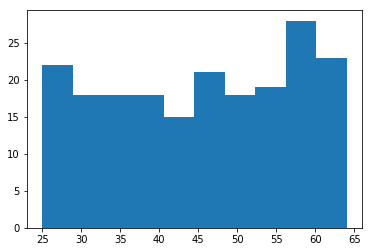

In [65]:
np.random.seed(256) # Set the random seed
data['AGE'] = np.random.randint(25,65, size= 200)
#data = data.astype({"AGE": int})
plt.hist(data['AGE'])

In [62]:
print(data)

     GENDER  AGE EDUCATION OCCUPATION EXPERIENCE AREA INCOME  \
0      Male   52       NaN        NaN        NaN  NaN    NaN   
1    Female   59       NaN        NaN        NaN  NaN    NaN   
2      Male   21       NaN        NaN        NaN  NaN    NaN   
3      Male   45       NaN        NaN        NaN  NaN    NaN   
4      Male   58       NaN        NaN        NaN  NaN    NaN   
5      Male   43       NaN        NaN        NaN  NaN    NaN   
6      Male   22       NaN        NaN        NaN  NaN    NaN   
7      Male   44       NaN        NaN        NaN  NaN    NaN   
8    Female   27       NaN        NaN        NaN  NaN    NaN   
9      Male   56       NaN        NaN        NaN  NaN    NaN   
10     Male   26       NaN        NaN        NaN  NaN    NaN   
11   Female   56       NaN        NaN        NaN  NaN    NaN   
12   Female   54       NaN        NaN        NaN  NaN    NaN   
13   Female   34       NaN        NaN        NaN  NaN    NaN   
14   Female   52       NaN        NaN   

In [67]:
jobs = {
    # 'title': (p, min salary, max salary)
    'developer': (0.4, 40000, 55000),
    'business manager': (0.1, 70000, 85000),
    'staff': (0.4, 25000, 45000),
    'senior developer': (0.1, 55000, 75000),
}

titles = [title for title in jobs.keys()]
p = [job[0] for job in jobs.values()]
title = np.random.choice(titles, size=1, p=p)[0]

min_salary = jobs[title][1]
max_salary = jobs[title][2]
salary = np.random.randint(min_salary, max_salary)
print(salary)

42416


significant divide in earnings from county to county.

The Central Statistics Office (CSO) numbers show that the average income for Irish households stood at €45,256 in 2016.

The Dublin coastal town of Malahide had the highest average income of €78,631 of all 41 towns in the country with a population of 10,000 or over.

Celbridge in Co Kildare had the second highest at €64,877 while Maynooth was third at €64,529. The towns with the lowest average incomes were Longford at €29,224, Enniscorthy, Co Wexford, at €31,049 and Ballina, Co Mayo, with €32,779.

Dublin City had the highest earned income per person at €39,999, followed by Dún Laoghaire-Rathdown, €37,117, and Cork City, €34,317.

The lowest earned incomes per person by county were in Donegal at €24,626, Monaghan at €24,903 and Leitrim at €25,962. The figures showed that 42.3pc of households had two or more people earning an income, while 30.1pc had just one member earning a wage.

In [57]:
#An average of 27pc of households throughout the country had no income earners at all

#Social welfare payments to people of working age made up more than half of the income in 13.7pc of households 
#while the State pension formed the majority of income in 12.9pc.
#This gave a total of 26.6pc of households where social welfare made up more than half of household income in Ireland in 2016.
# Households where the occupants were in the medical, finance, legal and IT professions enjoyed the highest incomes, 
#while farmers, care workers and home carers earned under €30,000.
#gender
#The data also showed a significant gender gap in some professions. 
#In the financial managers and directors' sector, female income was €60,126 compared with €94,500 for males. 
#In contrast, the primary and nursery teaching professions had the smallest gender gaps.
#Travel
#The CSO revealed that those who travel farthest to work also earn the most. 
#The average worker driving less than 30 minutes to work earns €32,004 a year,
#compared with €41,495 for those travelling more than 30 minutes.
# education 
#Those who described their health as "very bad" earned an average of €11,700, 
#but those who earned more than €27,579 reported their health as "very good".
#source: https://www.independent.ie/business/personal-finance/latest-news/great-divide-in-household-income-across-the-country-is-laid-bare-38239841.html


KeyError: 'INCOME'